<a href="https://colab.research.google.com/github/sapinspys/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/LS_DS_124_Make_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Make features

Objectives
-  understand the purpose of feature engineering
-  work with strings in pandas
- work with dates and times in pandas

Links
- [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
- Python Data Science Handbook
  - [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations
  - [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series

## Get LendingClub data

[Source](https://www.lendingclub.com/info/download-data.action)

In [36]:
!wget https://resources.lendingclub.com/LoanStats_2019Q1.csv.zip

--2019-07-19 01:24:40--  https://resources.lendingclub.com/LoanStats_2019Q1.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2019Q1.csv.zip.2’

LoanStats_2019Q1.cs     [    <=>             ]  19.30M   810KB/s    in 25s     

2019-07-19 01:25:05 (805 KB/s) - ‘LoanStats_2019Q1.csv.zip.2’ saved [20240936]



In [37]:
!unzip LoanStats_2019Q1.csv.zip

Archive:  LoanStats_2019Q1.csv.zip
replace LoanStats_2019Q1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: LoanStats_2019Q1.csv    


In [38]:
!head LoanStats_2019Q1.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

## Load LendingClub data

pandas documentation
- [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
- [`options.display`](https://pandas.pydata.org/pandas-docs/stable/options.html#available-options)

In [39]:
import pandas as pd

df = pd.read_csv('LoanStats_2019Q1.csv', skiprows=1, skipfooter=2)

print(df.shape)

df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


(115675, 144)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,20000,20000,20000,60 months,17.19%,499.10,C,C5,Front desk supervisor,6 years,RENT,47000.0,Source Verified,Mar-2019,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,958xx,CA,14.02,0,Sep-2006,1,50.0,NaN,15,0,10687,19.7%,53,w,19254.76,19254.76,1459.10,1459.10,...,12.5,0,0,75824,31546,33800,21524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,12000,12000,12000,36 months,16.40%,424.26,C,C4,Executive Director,4 years,MORTGAGE,95000.0,Not Verified,Mar-2019,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,436xx,OH,29.50,0,Nov-1992,0,29.0,NaN,19,0,16619,64.9%,36,w,11475.92,11475.92,826.65,826.65,...,66.7,0,0,209488,51734,18500,54263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,3000,3000,3000,36 months,14.74%,103.62,C,C2,Office Manager,4 years,MORTGAGE,58750.0,Verified,Mar-2019,Current,n,NaN,NaN,medical,Medical expenses,327xx,FL,30.91,0,Jun-2004,0,24.0,NaN,16,0,20502,60.1%,25,f,2865.64,2865.64,202.33,202.33,...,71.4,0,0,69911,37816,11400,35811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,35000,35000,35000,36 months,15.57%,1223.08,C,C3,Store Manager,10+ years,RENT,122000.0,Verified,Mar-2019,Current,n,NaN,NaN,credit_card,Credit card refinancing,333xx,FL,22.00,1,Dec-2009,0,20.0,NaN,5,0,1441,24.4%,18,w,33459.43,33459.43,2446.76,2446.76,...,100.0,0,0,65640,24471,1600,59740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,5000,5000,5000,36 months,15.57%,174.73,C,C3,Area Manager,3 years,OWN,65000.0,Verified,Mar-2019,Current,n,NaN,NaN,house,Home buying,640xx,MO,16.28,1,Jul-2001,0,7.0,NaN,9,0,5604,64.4%,25,w,4778.86,4778.86,340.81,340.81,...,50.0,0,0,38190,29775,4400,29490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df.isna().sum()

id                                            115675
member_id                                     115675
loan_amnt                                          0
funded_amnt                                        0
funded_amnt_inv                                    0
term                                               0
int_rate                                           0
installment                                        0
grade                                              0
sub_grade                                          0
emp_title                                      19518
emp_length                                     11101
home_ownership                                     0
annual_inc                                         0
verification_status                                0
issue_d                                            0
loan_status                                        0
pymnt_plan                                         0
url                                           

In [41]:
df[df.loan_amnt.isna()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term


In [42]:
!tail LoanStats_2019Q1.csv

"","","5000","5000","5000"," 36 months"," 13.56%","169.83","C","C1","","n/a","MORTGAGE","48000","Not Verified","Jan-2019","Current","n","","","home_improvement","Home improvement","338xx","FL","8.28","2","May-2006","0","11","","8","0","3846","13.6%","21","w","4420.40","4420.40","841.62","841.62","579.60","262.02","0.0","0.0","0.0","Jun-2019","169.83","Jul-2019","Jun-2019","0","","1","Individual","","","","0","0","35666","0","1","0","0","49","5336","47","0","2","0","23","28200","0","3","0","2","4458","","","0","0","99","151","13","13","1","","","","11","0","0","3","0","1","4","6","16","3","8","0","0","0","0","90.5","","0","0","88613","9182","0","11413","","","","","","","","","","","","N","","","","","","","","","","","","","","","N","","","","","",""
"","","40000","40000","40000"," 36 months","  6.46%","1225.24","A","A1","President - North America","4 years","MORTGAGE","520000","Verified","Jan-2019","Current","n","","","credit_card","Credit card refinancing","752xx","TX","9.96","0","Se

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115675 entries, 0 to 115674
Columns: 144 entries, id to settlement_term
dtypes: float64(56), int64(52), object(36)
memory usage: 127.1+ MB


## Work with strings

For machine learning, we usually want to replace strings with numbers.

We can get info about which columns have a datatype of "object" (strings)

In [44]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,url,desc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,...,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,115675.000000,115675.000000,115675.000000,115675.000000,1.156750e+05,0.0,0.0,115418.000000,115675.000000,115675.000000,49876.000000,13423.000000,115675.000000,115675.000000,115675.000000,115675.000000,115675.000000,115675.000000,115675.000000,115675.000000,115675.000000,115675.000000,115675.000000,115675.0,115675.0,115675.000000,115675.000000,24998.000000,115675.0,1.668100e+04,16681.000000,115675.0,115675.000000,1.156750e+05,115675.000000,115675.000000,115675.000000,115675.000000,...,115675.000000,115675.000000,115675.000000,115675.000000,115675.000000,115675.000000,115675.000000,115675.000000,112529.0,115675.0,115675.000000,115675.000000,115675.000000,114346.000000,115675.000000,115675.0,1.156750e+05,1.156750e+05,115675.000000,1.156750e+05,16681.000000,16681.000000,16681.000000,16681.000000,16451.000000,16681.000000,16681.000000,16681.000000,16681.000000,4901.000000,1.0,1.00,1.0,1.0,1.00,1.00,1.0,1.0,1.0,1.0
mean,NaN,NaN,16671.263021,16671.263021,16668.042144,481.083874,8.505333e+04,NaN,NaN,20.445427,0.227595,0.443069,36.654864,87.794830,11.723544,0.117484,17859.725835,23.121262,14769.657755,14766.934018,2526.362844,2525.758973,1880.341193,645.880945,0.140706,0.0,0.0,1026.634408,0.016693,46.419034,1.0,1.393034e+05,19.539382,0.0,176.482818,1.530888e+05,0.913776,2.790430,0.701145,1.586721,...,5.544664,5.020324,7.205749,8.475159,8.301630,13.071761,5.501388,11.705909,0.0,0.0,0.058007,1.992349,94.919273,32.611930,0.117441,0.0,1.971531e+05,5.585600e+04,29185.391589,4.871611e+04,39336.440801,0.564535,1.647743,11.707931,55.987022,3.083148,12.661231,0.027277,0.052515,39.243420,3.0,35.21,3.0,11.0,105.63,5636.06,5.9,2839.0,65.0,18.0
std,NaN,NaN,10352.132790,10352.132790,10354.685658,290.651469,1.098949e+05,NaN,NaN,20.480562,0.746965,0.736914,21.806311,21.745046,5.977082,0.327165,22735.701183,12.177136,10017.773578,10019.645719,3712.764848,3712.694129,3631.076603,520.540978,2.432110,0.0,0.0,3362.997605,0.140971,21.887349,0.0,8.027360e+04,8.099141,0.0,1776.351801,1.718055e+05,1.127978,2.912667,0.934572,1.554939,...,3.507135,3.263597,4.548438,7.413471,4.983926,7.922110,3.450848,5.974131,0.0,0.0,0.421806,1.857690,8.640351,34.464534,0.327114,0.0,1.940234e+05,5.591184e+04,26975.924435,5.049259e+04,33132.189920,0.911911,1.795547,6.671331,25.583408,3.224937,8.226743,0.260578,0.310101,23.687664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1000.000000,1000.000000,725.000000,30.640000,0.000000e+00,NaN,NaN,0.000000,0.000000,0.000000,1.000000,12.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.0,1.760400e+04,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.0000

In [45]:
df.describe(include='object')

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint,sec_app_earliest_cr_line,hardship_flag,hardship_type,hardship_reason,hardship_status,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_loan_status,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date
count,115675,115675,115675,115675,96157,104574,115675,115675,115675,115675,115675,115675,115675,115675,115675,115675,115546,115675,115445,110769,115673,115675,14624,16681,115675,1,1,1,1,1,1,1,115675,1,1,1
unique,2,53,7,33,39387,11,5,3,3,6,1,12,12,877,50,652,1055,2,7,3,7,2,3,577,2,1,1,1,1,1,1,1,2,1,1,1
top,36 months,8.19%,A,A4,Teacher,10+ years,MORTGAGE,Not Verified,Jan-2019,Current,n,debt_consolidation,Debt consolidation,750xx,CA,Aug-2006,0%,w,Jun-2019,Jul-2019,Jun-2019,Individual,Not Verified,Aug-2006,N,INTEREST ONLY-3 MONTHS DEFERRAL,INCOME_CURTAILMENT,ACTIVE,Jun-2019,Sep-2019,Jul-2019,In Grace Period,N,May-2019,ACTIVE,May-2019
freq,78429,11314,37060,11314,2037,34490,58578,54608,43584,109176,115675,63747,63747,1162,15902,1033,1054,101423,102101,110738,111240,98994,6395,150,115674,1,1,1,1,1,1,1,115674,1,1,1


In [46]:
df.emp_length.value_counts()

10+ years    34490
< 1 year     15044
2 years       9695
3 years       8719
1 year        7919
5 years       7189
4 years       6777
6 years       4636
7 years       3913
8 years       3625
9 years       2567
Name: emp_length, dtype: int64

### Convert `int_rate`


In [47]:
# Let's begin cleaning this data by focusing on int_rate

# Simplify problem.. how to do it on smale scale?

x = '12.5%'
# float("".join(list(x)[:-1]))
float(x.strip('%'))

12.5

In [0]:
# Apply it to the data

# df['int_rate'] = df['int_rate'].str.strip('%').astype(float)

In [49]:
df.int_rate.head()

0     17.19%
1     16.40%
2     14.74%
3     15.57%
4     15.57%
Name: int_rate, dtype: object

### Define a function to remove percent signs from strings and convert to floats

Apply the function to the `int_rate` column

In [50]:
# Always begin with a test case

def remove_percent_sign(string):
  '''Always include semantic naming conventions and comment about what the 
  function does. This function takes a string as input, strips trailing percent
  sign, and returns a float value.'''
  return float(string.strip('%'))

print(x)
print(remove_percent_sign(x))

12.5%
12.5


In [51]:
# df['int_rate']= df['int_rate'].apply(remove_percent_sign)
df['int_rate']= df['int_rate'].apply(lambda string : float(string.strip('%')))

df.int_rate.head()

0    17.19
1    16.40
2    14.74
3    15.57
4    15.57
Name: int_rate, dtype: float64

In [52]:
# New opportunities with float values!

df.int_rate.describe()

count    115675.000000
mean         12.720160
std           4.854991
min           6.000000
25%           8.190000
50%          11.800000
75%          15.570000
max          30.890000
Name: int_rate, dtype: float64

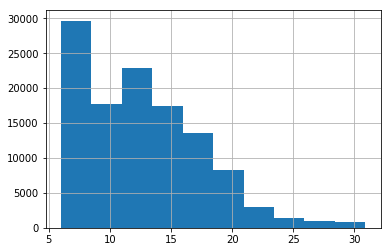

In [53]:
df.int_rate.hist()

### Clean `emp_title`

Look at top 20 titles

In [54]:
df.emp_title.value_counts().head(20)

Teacher                     2037
Manager                     1626
Registered Nurse             898
Driver                       857
Supervisor                   655
RN                           623
Sales                        586
Office Manager               574
Project Manager              540
General Manager              486
Owner                        449
Director                     374
Operations Manager           313
Engineer                     309
Truck Driver                 308
Sales Manager                288
Nurse                        281
Administrative Assistant     267
Supervisor                   260
Accountant                   259
Name: emp_title, dtype: int64

How often is `emp_title` null?

In [55]:
df.emp_title.isna().sum()/df.shape[0]

# most are clean

0.1687313594121461

Clean the title and handle missing values
- Capitalize
- Remove Spaces
- Replace 'NaN' with 'Missing'

In [56]:
import numpy as np 

example = ['owner', 'Supervisor ', ' Project manager', np.nan]

def clean_emp_title(x):
  ''' '''
  # Checks if x is a string
  if isinstance(x, str):
    return x.strip().title()
  else:
    return 'Missing'
  
# for ex in example:
#   print(clean_emp_title(ex))

print([clean_emp_title(ex) for ex in example])

['Owner', 'Supervisor', 'Project Manager', 'Missing']


In [57]:
df['emp_title'] = df['emp_title'].apply(clean_emp_title)
df.emp_title.head(20)

0       Front Desk Supervisor
1          Executive Director
2              Office Manager
3               Store Manager
4                Area Manager
5                         Svp
6                 Vp Of Sales
7                       Sales
8                          Rn
9             Project Manager
10          Custom Applicator
11                 Av Manager
12    Human Resources Liaison
13                    Missing
14                      Agent
15            Sales/Marketing
16                        Ceo
17                  Route Rep
18                Maintenance
19        Executive Assistant
Name: emp_title, dtype: object

In [58]:
df.emp_title.nunique()

31429

In [59]:
df.emp_title.value_counts().head(10)

Missing             19518
Teacher              2465
Manager              2172
Registered Nurse     1306
Driver               1194
Supervisor           1109
Office Manager        834
Sales                 806
Truck Driver          767
General Manager       737
Name: emp_title, dtype: int64

### Create `emp_title_manager`

pandas documentation: [`str.contains`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html)

In [60]:
df['emp_title'].str.contains('manager').value_counts()

False    115663
True         12
Name: emp_title, dtype: int64

In [61]:
df[df['emp_title'].str.contains('manager') == True].emp_title

22078                                 Casemanager
22510                                Salesmanager
23175                        Accounting/Hrmanager
30316                                Housemanager
34328      Cardiovascular/Imaging Procedurmanager
36150                    Salonmanager Hairstylist
40224                Registered Nurse Casemanager
41927    Executive Vice President Of Salesmanager
55053                                 Casemanager
56303                                  Submanager
78362                              Rn Casemanager
95005                                Housemanager
Name: emp_title, dtype: object

In [62]:
df['emp_title'].str.contains('Manager').value_counts()

False    99713
True     15962
Name: emp_title, dtype: int64

In [63]:
df['emp_title'].iloc[0:10]

0    Front Desk Supervisor
1       Executive Director
2           Office Manager
3            Store Manager
4             Area Manager
5                      Svp
6              Vp Of Sales
7                    Sales
8                       Rn
9          Project Manager
Name: emp_title, dtype: object

In [64]:
df['emp_title_manager'] = df.emp_title.str.contains('Manager')
df.emp_title_manager.value_counts()

False    99713
True     15962
Name: emp_title_manager, dtype: int64

In [65]:
df.int_rate.groupby(df['emp_title_manager']).mean()

emp_title_manager
False    12.744184
True     12.570085
Name: int_rate, dtype: float64

In [66]:
df.groupby('emp_title_manager').mean().int_rate

emp_title_manager
False    12.744184
True     12.570085
Name: int_rate, dtype: float64

## Work with dates

pandas documentation
- [to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)
- [Time/Date Components](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components) "You can access these properties via the `.dt` accessor"

In [67]:
df.issue_d.describe()

count       115675
unique           3
top       Jan-2019
freq         43584
Name: issue_d, dtype: object

In [68]:
df['issue_d'] = pd.to_datetime(df['issue_d'], infer_datetime_format=True)

df.issue_d.describe()

count                  115675
unique                      3
top       2019-01-01 00:00:00
freq                    43584
first     2019-01-01 00:00:00
last      2019-03-01 00:00:00
Name: issue_d, dtype: object

In [69]:
df.issue_d.isna().sum()

0

In [70]:
df['issue_d'].iloc[0:5].dt.month

0    3
1    3
2    3
3    3
4    3
Name: issue_d, dtype: int64

In [71]:
# Useful if you wanted to create new features and perform analyses with them

df['issue_d'].iloc[0:5].dt.year

0    2019
1    2019
2    2019
3    2019
4    2019
Name: issue_d, dtype: int64

In [72]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager
0,NaN,NaN,20000,20000,20000,60 months,17.19,499.10,C,C5,Front Desk Supervisor,6 years,RENT,47000.0,Source Verified,2019-03-01,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,958xx,CA,14.02,0,Sep-2006,1,50.0,NaN,15,0,10687,19.7%,53,w,19254.76,19254.76,1459.10,1459.10,...,0,0,75824,31546,33800,21524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False
1,NaN,NaN,12000,12000,12000,36 months,16.40,424.26,C,C4,Executive Director,4 years,MORTGAGE,95000.0,Not Verified,2019-03-01,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,436xx,OH,29.50,0,Nov-1992,0,29.0,NaN,19,0,16619,64.9%,36,w,11475.92,11475.92,826.65,826.65,...,0,0,209488,51734,18500,54263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False
2,NaN,NaN,3000,3000,3000,36 months,14.74,103.62,C,C2,Office Manager,4 years,MORTGAGE,58750.0,Verified,2019-03-01,Current,n,NaN,NaN,medical,Medical expenses,327xx,FL,30.91,0,Jun-2004,0,24.0,NaN,16,0,20502,60.1%,25,f,2865.64,2865.64,202.33,202.33,...,0,0,69911,37816,11400,35811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,True
3,NaN,NaN,35000,35000,35000,36 months,15.57,1223.08,C,C3,Store Manager,10+ years,RENT,122000.0,Verified,2019-03-01,Current,n,NaN,NaN,credit_card,Credit card refinancing,333xx,FL,22.00,1,Dec-2009,0,20.0,NaN,5,0,1441,24.4%,18,w,33459.43,33459.43,2446.76,2446.76,...,0,0,65640,24471,1600,59740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,True
4,NaN,NaN,5000,5000,5000,36 months,15.57,174.73,C,C3,Area Manager,3 years,OWN,65000.0,Verified,2019-03-01,Current,n,NaN,NaN,house,Home buying,640xx,MO,16.28,1,Jul-2001,0,7.0,NaN,9,0,5604,64.4%,25,w,4778.86,4778.86,340.81,340.81,...,0,0,38190,29775,4400,29490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,True


In [0]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

In [0]:
df['days_since_earliest_cr_line'] = (df['issue_d'] - df['earliest_cr_line'])

In [75]:
df.days_since_earliest_cr_line.describe()

count                       115675
mean     5972 days 05:52:16.349254
std      2904 days 05:11:38.410374
min             1124 days 00:00:00
25%             4141 days 00:00:00
50%             5358 days 00:00:00
75%             7367 days 00:00:00
max            27453 days 00:00:00
Name: days_since_earliest_cr_line, dtype: object

In [76]:
[col for col in df if col.endswith('_d')]

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [0]:
for col in ['last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']:
  df[col] = pd.to_datetime(df[col])

In [78]:
df.describe(include='datetime')

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
count,115675,115675,115445,110769,115673
unique,3,652,7,3,7
top,2019-01-01 00:00:00,2006-08-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-06-01 00:00:00
freq,43584,1033,102101,110738,111240
first,2019-01-01 00:00:00,1944-01-01 00:00:00,2019-01-01 00:00:00,2019-06-01 00:00:00,2018-12-01 00:00:00
last,2019-03-01 00:00:00,2016-02-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-06-01 00:00:00


# ASSIGNMENT

- Replicate the lesson code.

- Convert the `term` column from string to integer.

- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.

- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [79]:
df.term.value_counts()

 36 months    78429
 60 months    37246
Name: term, dtype: int64

In [0]:
# Small scale test

term = '36 months'


# STRETCH OPTIONS

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01